In [2]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 4.7 MB/s eta 0:00:00a 0:00:01


In [3]:
import mysql.connector

In [6]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="UypX743+",
  database="crime"
)

print(mydb)

In [7]:
cursur = mydb.cursor()

In [9]:
query = "SELECT *FROM crime"

In [10]:
cursur.execute(query)

In [11]:
data  = cursur.fetchall()

In [12]:
data

[(1001,
  'Burglary',
  'Shenzhen',
  '2024-01-01',
  '00:00',
  63,
  30,
  'Unknown',
  27.49080238,
  103.7026586),
 (1002,
  'Fraud',
  'Wuhan',
  '2024-01-01',
  '00:01',
  47,
  59,
  'Unknown',
  39.01428613,
  110.8380189),
 (1003,
  'Burglary',
  'Beijing',
  '2024-01-01',
  '00:02',
  57,
  20,
  'Unknown',
  34.63987884,
  117.4589167),
 (1004,
  'Assault',
  'Chongqing',
  '2024-01-02',
  '00:04',
  35,
  26,
  'Knife',
  31.97316968,
  114.6444977),
 (1005,
  'Assault',
  'Shenzhen',
  '2024-01-02',
  '00:05',
  68,
  29,
  'None',
  23.12037281,
  116.131223),
 (1006,
  'Theft',
  'Guangzhou',
  '2024-01-02',
  '00:07',
  65,
  40,
  'Gun',
  23.11989041,
  113.1756673),
 (1007,
  'Vandalism',
  'Shenzhen',
  '2024-01-03',
  '00:08',
  19,
  31,
  'Knife',
  21.16167224,
  113.8455313),
 (1008,
  'Burglary',
  'Chongqing',
  '2024-01-03',
  '00:10',
  49,
  50,
  'Knife',
  37.32352292,
  116.983913),
 (1009,
  'Theft',
  'Chongqing',
  '2024-01-03',
  '00:11',
  25,
  35

In [17]:
column_names = [i[0] for i in cursur.description]

In [18]:
column_names

['Crime_ID',
 'Crime_Type',
 'Location',
 'Date',
 'Time',
 'Victim_Age',
 'Suspect_Age',
 'Weapon_Used',
 'Latitude',
 'Longitude']

In [15]:
import pandas as pd

In [22]:
df = pd.DataFrame(data,columns=column_names)

In [23]:
df

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Unknown,27.490802,103.702659
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Unknown,39.014286,110.838019
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Unknown,34.639879,117.458917
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,None,23.120373,116.131223
...,...,...,...,...,...,...,...,...,...,...
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Unknown,21.831641,113.139103
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Unknown,38.346272,119.132292
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,None,22.736373,101.379160
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,None,39.004747,101.141094


In [24]:
cursur.close()
mydb.close()

In [25]:
df.isnull().sum()

Crime_ID       0
Crime_Type     0
Location       0
Date           0
Time           0
Victim_Age     0
Suspect_Age    0
Weapon_Used    0
Latitude       0
Longitude      0
dtype: int64

In [27]:
df.Crime_Type.value_counts()

Burglary     213
Theft        209
Fraud        203
Vandalism    200
Assault      175
Name: Crime_Type, dtype: int64

In [28]:
df.Location.value_counts()

Beijing      147
Guangzhou    139
Chengdu      129
Shanghai     122
Xi'an        118
Wuhan        117
Chongqing    116
Shenzhen     112
Name: Location, dtype: int64

In [29]:
df.Weapon_Used.value_counts()

Knife      232
Unknown    211
None       198
Bat        193
Gun        166
Name: Weapon_Used, dtype: int64

In [33]:
df['Weapon_Used'] = df['Weapon_Used'].replace("Unknown","Miscellaneous")

In [35]:
df['Weapon_Used'] = df['Weapon_Used'].replace("None","No Weapon")

In [36]:
df

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Miscellaneous,27.490802,103.702659
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Miscellaneous,39.014286,110.838019
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Miscellaneous,34.639879,117.458917
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,No Weapon,23.120373,116.131223
...,...,...,...,...,...,...,...,...,...,...
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Miscellaneous,21.831641,113.139103
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Miscellaneous,38.346272,119.132292
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,No Weapon,22.736373,101.379160
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,No Weapon,39.004747,101.141094


In [38]:
df.duplicated().sum()

0

In [44]:
df.Location.value_counts()

Beijing      147
Guangzhou    139
Chengdu      129
Shanghai     122
Xi'an        118
Wuhan        117
Chongqing    116
Shenzhen     112
Name: Location, dtype: int64

In [45]:
# crime rate
totalcrimes = df.shape[0]
totalcrimes

1000

In [53]:
crime_count = df.Location.value_counts()

In [56]:
crime_rate = (crime_count/totalcrimes) *100

In [58]:
crime_rate

Beijing      14.7
Guangzhou    13.9
Chengdu      12.9
Shanghai     12.2
Xi'an        11.8
Wuhan        11.7
Chongqing    11.6
Shenzhen     11.2
Name: Location, dtype: float64

In [59]:
#Most Frequent Crime Types
df.Crime_Type.value_counts()

Burglary     213
Theft        209
Fraud        203
Vandalism    200
Assault      175
Name: Crime_Type, dtype: int64

In [61]:
import datetime as dt

In [64]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [65]:
df

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Miscellaneous,27.490802,103.702659
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Miscellaneous,39.014286,110.838019
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Miscellaneous,34.639879,117.458917
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,No Weapon,23.120373,116.131223
...,...,...,...,...,...,...,...,...,...,...
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Miscellaneous,21.831641,113.139103
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Miscellaneous,38.346272,119.132292
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,No Weapon,22.736373,101.379160
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,No Weapon,39.004747,101.141094


In [74]:
df['Month'] = df['Date'].dt.month

In [75]:
df

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude,Month
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Miscellaneous,27.490802,103.702659,1
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Miscellaneous,39.014286,110.838019,1
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Miscellaneous,34.639879,117.458917,1
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498,1
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,No Weapon,23.120373,116.131223,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Miscellaneous,21.831641,113.139103,12
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Miscellaneous,38.346272,119.132292,12
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,No Weapon,22.736373,101.379160,12
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,No Weapon,39.004747,101.141094,12


In [82]:
crimes_per_month = df['Month'].value_counts().sort_index()
print("Crimes per Month:")
print(crimes_per_month)


Crimes per Month:
1     85
2     80
3     85
4     82
5     85
6     82
7     84
8     85
9     82
10    85
11    82
12    83
Name: Month, dtype: int64


In [77]:
import matplotlib.pyplot as plt

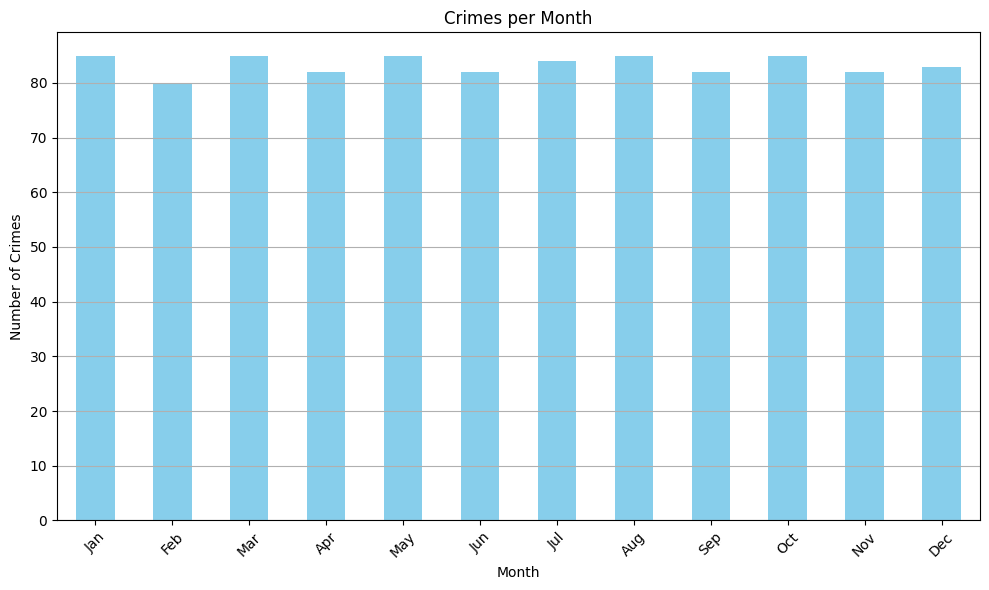

In [80]:
plt.figure(figsize=(10, 6))
crimes_per_month.plot(kind='bar', color='skyblue')
plt.title('Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Crimes per Season:
Spring    252
Summer    251
Fall      249
Winter    248
Name: Season, dtype: int64


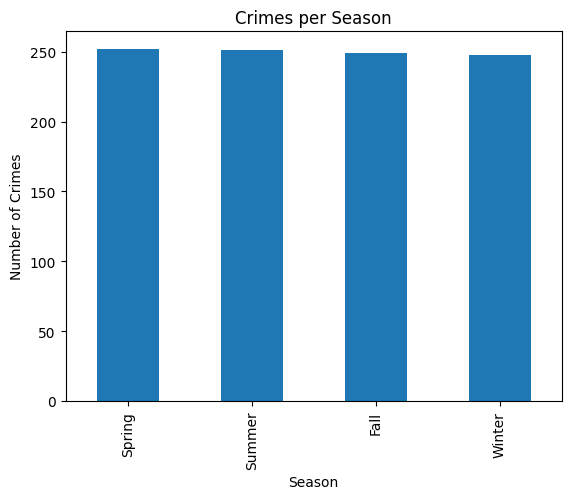

In [83]:
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df['Season'] = df['Month'].map(season_mapping)

crimes_per_season = df['Season'].value_counts()
print("\nCrimes per Season:")
print(crimes_per_season)

crimes_per_season.plot(kind='bar', title='Crimes per Season')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.show()

Crimes by Age Group:
Age_Group
0-18       0
19-25    116
26-35    213
36-45    189
46-60    289
61+      193
dtype: int64


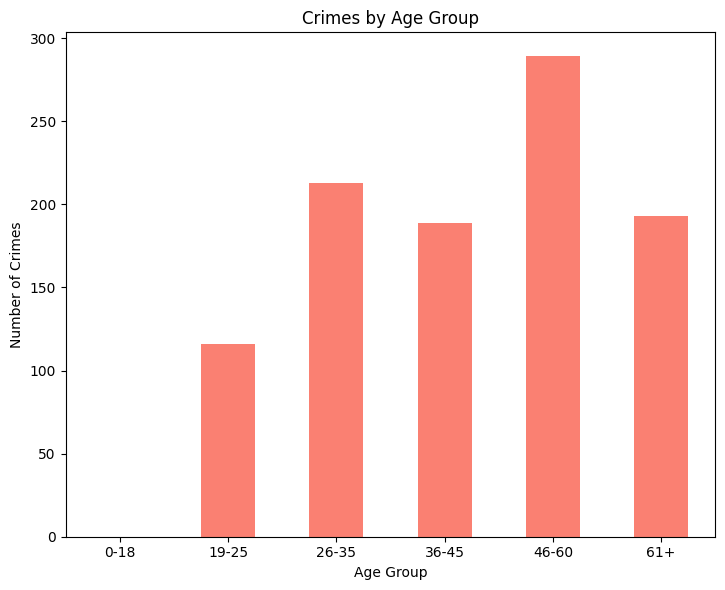

In [87]:
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '61+']
df['Age_Group'] = pd.cut(df['Victim_Age'], bins=bins, labels=labels, right=False)
crime_counts_by_age = df.groupby('Age_Group').size()
print("Crimes by Age Group:")
print(crime_counts_by_age)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
crime_counts_by_age.plot(kind='bar', color='salmon')
plt.title('Crimes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [88]:
!pip install geopandas folium

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.0 MB/s eta 0:00:00


In [89]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

print(gdf)

     Crime_ID Crime_Type   Location       Date   Time  Victim_Age  \
0        1001   Burglary   Shenzhen 2024-01-01  00:00          63   
1        1002      Fraud      Wuhan 2024-01-01  00:01          47   
2        1003   Burglary    Beijing 2024-01-01  00:02          57   
3        1004    Assault  Chongqing 2024-01-02  00:04          35   
4        1005    Assault   Shenzhen 2024-01-02  00:05          68   
..        ...        ...        ...        ...    ...         ...   
995      1996      Fraud    Chengdu 2024-12-29  23:53          18   
996      1997  Vandalism      Xi'an 2024-12-29  23:54          37   
997      1998    Assault  Guangzhou 2024-12-30  23:56          39   
998      1999      Fraud  Guangzhou 2024-12-30  23:57          65   
999      2000   Burglary    Chengdu 2024-12-31  23:59          28   

     Suspect_Age    Weapon_Used   Latitude   Longitude  Month  Season  \
0             30  Miscellaneous  27.490802  103.702659      1  Winter   
1             59  Miscell

In [102]:
crime_rate

0.0

In [103]:
# crime rate
totalcrimes = df.shape[0]
totalcrimes

1000

In [104]:
crime_count = df.Location.value_counts()
crime_rate = (crime_count/totalcrimes) *100

In [101]:
import folium

m = folium.Map(location=[37.7749, -122.4194], zoom_start=13)

for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Crime_Type'],
        icon=folium.Icon(color='blue' if row['Crime_Type'] == 'Theft' else 'red')
    ).add_to(m)

m.save("crime_map.html")
m


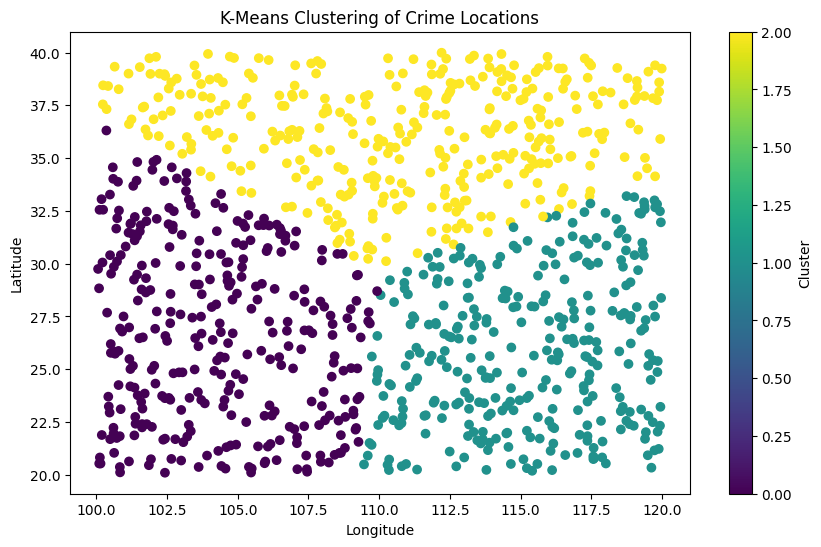

In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
X = df[['Latitude', 'Longitude']]

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Crime Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


In [92]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 488.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 269.5 kB/s eta 0:00:00a 0:00:02


In [93]:
df

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude,Month,Season,Age_Group,Cluster
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Miscellaneous,27.490802,103.702659,1,Winter,61+,0
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Miscellaneous,39.014286,110.838019,1,Winter,46-60,2
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Miscellaneous,34.639879,117.458917,1,Winter,46-60,2
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498,1,Winter,36-45,2
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,No Weapon,23.120373,116.131223,1,Winter,61+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Miscellaneous,21.831641,113.139103,12,Winter,19-25,1
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Miscellaneous,38.346272,119.132292,12,Winter,36-45,2
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,No Weapon,22.736373,101.379160,12,Winter,36-45,0
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,No Weapon,39.004747,101.141094,12,Winter,61+,2


In [94]:
crime_counts = df.groupby('Date').size().reset_index(name='Crime_Counts')

In [95]:
crime_counts

,Date,Crime_Counts
0,2024-01-01,3
1,2024-01-02,3
2,2024-01-03,3
3,2024-01-04,2
4,2024-01-05,3
...,...,...
361,2024-12-27,2
362,2024-12-28,3
363,2024-12-29,3
364,2024-12-30,2


Importing plotly failed. Interactive plots will not work.
16:42:03 - cmdstanpy - INFO - Chain [1] start processing
16:42:05 - cmdstanpy - INFO - Chain [1] done processing


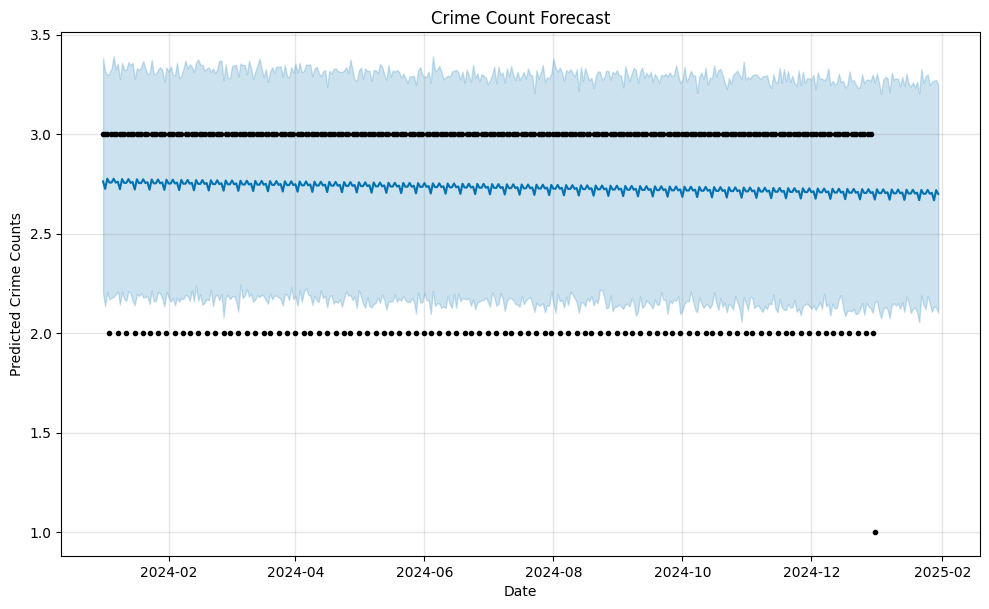

In [97]:
from prophet import Prophet
crime_counts.rename(columns={'Date': 'ds', 'Crime_Counts': 'y'}, inplace=True)


model = Prophet()
model.fit(crime_counts)


future = model.make_future_dataframe(periods=30)  
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Crime Count Forecast')
plt.xlabel('Date')
plt.ylabel('Predicted Crime Counts')
plt.show()